In [1]:
!pip install pandas_visual_analysis

In [2]:
import pandas as pd
df = pd.read_csv("netflix_titles_2021.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
from pandas_visual_analysis import VisualAnalysis


In [6]:
df1 = df.drop(['director','cast'],axis=1)

In [7]:
df1.fillna({"country":'Missing',"date_added":"Missing","rating":"Missing",'duration':'Missing'},inplace=True)

In [8]:
df1.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
df1.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [32]:
VisualAnalysis(df1)

Text(0.5, 1.0, 'Year Wise Releases')

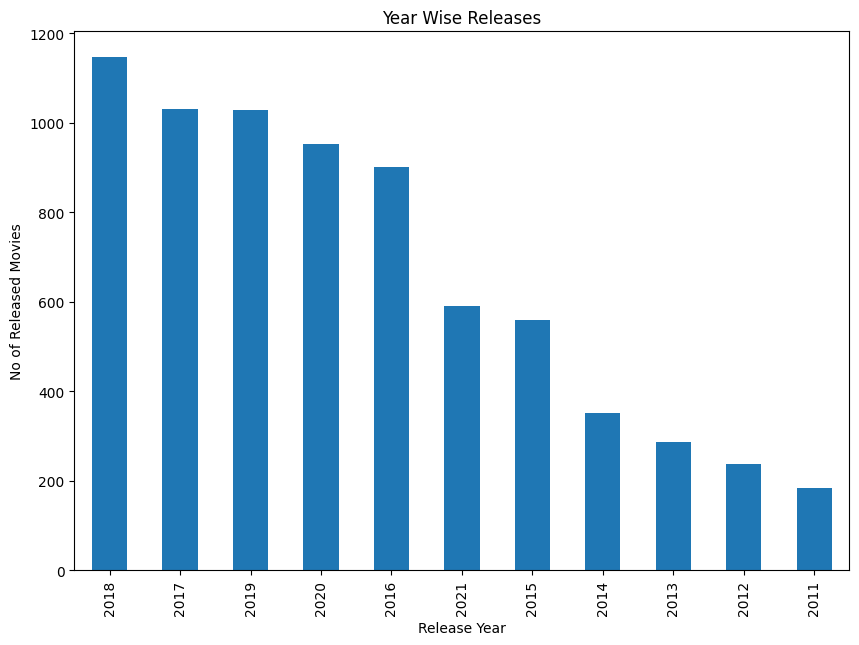

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
g = df[df['release_year'] > 2010].release_year.value_counts().plot.bar(figsize=(10, 7))
g.set_xlabel("Release Year")
g.set_ylabel("No of Released Movies")
g.set_title("Year Wise Releases")

Text(0.5, 1.0, 'Ratings Wise Counts')

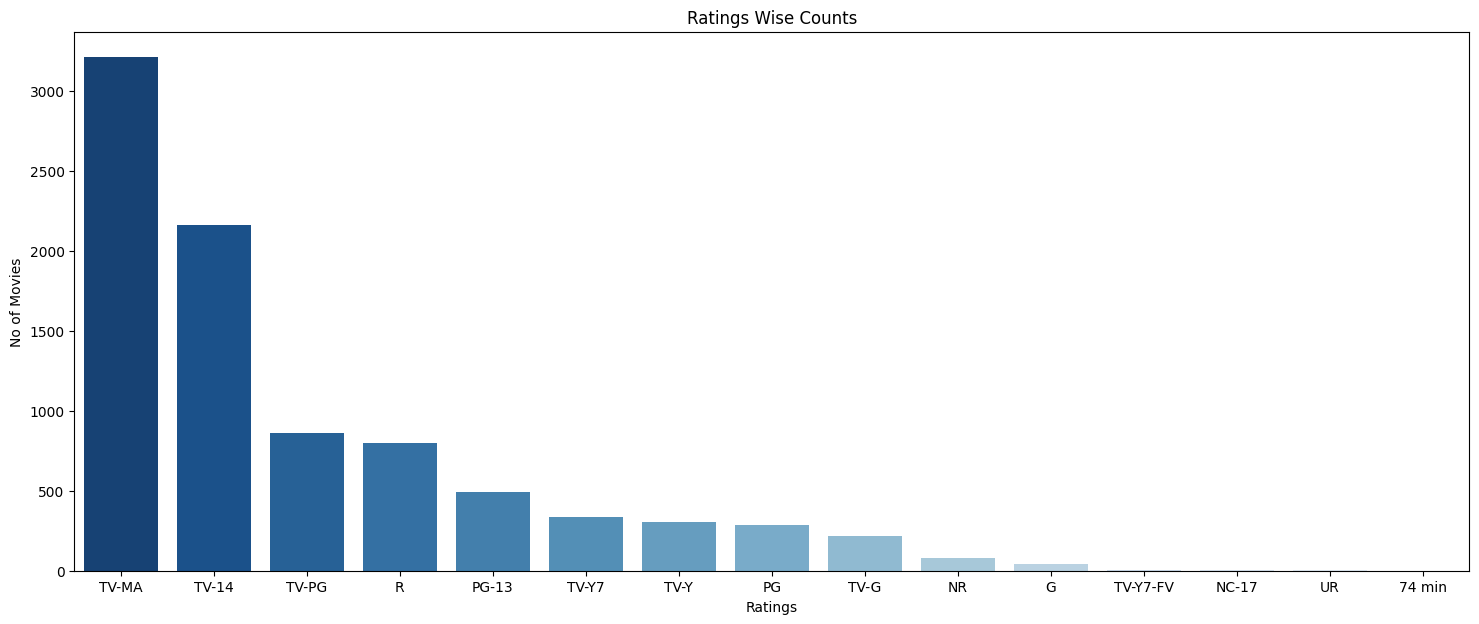

In [30]:
import seaborn as sns
plt.figure(figsize=(18,7))
g = sns.countplot(x='rating', data=df, palette='Blues_r', order=df['rating'].value_counts().index[0:15])
g.set_xlabel("Ratings")
g.set_ylabel("No of Movies")
g.set_title("Ratings Wise Counts")

In [31]:
df[df['type'] == 'TV Show'].sort_values('release_year')[0:5]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
1331,s1332,TV Show,Five Came Back: The Reference Films,NaN,NaN,United States,"February 9, 2021",1945,TV-MA,1 Season,TV Shows,This collection includes 12 World War II-era p...
7743,s7744,TV Show,Pioneers of African-American Cinema,"Oscar Micheaux, Spencer Williams, Richard E. N...",NaN,United States,"February 1, 2017",1946,TV-14,1 Season,TV Shows,This newly preserved collection features more ...
8541,s8542,TV Show,The Twilight Zone (Original Series),NaN,Rod Serling,United States,"July 1, 2017",1963,TV-14,4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy","Hosted by creator Rod Serling, this groundbrea..."
8189,s8190,TV Show,The Andy Griffith Show,NaN,"Andy Griffith, Ron Howard, Don Knotts, Frances...",United States,"July 1, 2017",1967,TV-G,8 Seasons,"Classic & Cult TV, TV Comedies",Homespun humor and easygoing Sheriff Andy Tayl...


# OBSERVATIONS

1) Netflix stress more over creation of movies instead of TV shows.

2) Around 1200 Netflix shows are from United States that counts the highest from all countries and India comes next to United States with more than 900 shows.

3) More than 1000 movies and shows were released in 2018 and year 2011 counts the lowest with less than 200 and one more thing can be observed that number of releases each coming year are less after marking 2018 with highest releases.

4) TV-MA and TV-14 are most ratings given by to movies and shows, with over 3000 to TV-MA.

5) The ‘Pioneers: First Women Filmmakers’ was the oldest show on Netflix which was released in 1925. It was added in late 2018 on Netflix
